In [1]:
import sympy
import numpy as np
from sympy.printing.pycode import pycode
import matplotlib.pyplot as plt

In [2]:
x_d, y_d, z_d, b, nu, E = sympy.symbols("x_d y_d z_d b nu E")

u_x = (b / (2 * sympy.pi)) * (
    sympy.atan(y_d / x_d) + ((x_d * y_d) / (2 * (1 - nu) * (x_d**2 + y_d**2)))
)

u_y = -(b / (2 * sympy.pi)) * (
    ((1 - 2 * nu) / (4 * (1 - nu))) * sympy.ln(x_d**2 + y_d**2)
    + ((x_d**2 - y_d**2) / (4 * (1 - nu) * (x_d**2 + y_d**2)))
)

In [3]:
dux_dx = sympy.Derivative(u_x, x_d).simplify().simplify()
duy_dy = sympy.Derivative(u_y, y_d).simplify().simplify()
dux_dy = sympy.Derivative(u_x, y_d).simplify().simplify()
duy_dx = sympy.Derivative(u_y, x_d).simplify().simplify()

In [33]:
beta_11 = dux_dx
beta_22 = duy_dy
beta_33 = sympy.zeros(1, 1)[0]
beta_12 = dux_dy
beta_21 = duy_dx
beta_31 = sympy.zeros(1, 1)[0]
beta_13 = sympy.zeros(1, 1)[0]
beta_32 = sympy.zeros(1, 1)[0]
beta_23 = sympy.zeros(1, 1)[0]


In [114]:
def curl_vector( a1, a2, a3, x, y, z ):
    b1 = sympy.Derivative(a3, y).simplify() - sympy.Derivative(a2, z).simplify()
    b2 = sympy.Derivative(a1, z).simplify() - sympy.Derivative(a3, x).simplify()
    b3 = sympy.Derivative(a2, x).simplify() - sympy.Derivative(a1, y).simplify()
    return b1.simplify(), b2.simplify(), b3.simplify()

In [115]:
alpha_11, alpha_21, alpha_31 = curl_vector( beta_11, beta_21, beta_31, x_d, y_d, z_d )
alpha_12, alpha_22, alpha_32 = curl_vector( beta_12, beta_22, beta_32, x_d, y_d, z_d )
alpha_13, alpha_23, alpha_33 = curl_vector( beta_13, beta_23, beta_33, x_d, y_d, z_d )

In [117]:
alpha_11, alpha_21, alpha_31

(0, 0, b*(x_d**2 - y_d**2)/(pi*(x_d**4 + 2*x_d**2*y_d**2 + y_d**4)))

In [118]:
alpha_12, alpha_22, alpha_32

(0, 0, 2*b*x_d*y_d/(pi*(x_d**4 + 2*x_d**2*y_d**2 + y_d**4)))

In [120]:
alpha_13, alpha_23, alpha_33

(0, 0, 0)

In [144]:
#print(pycode(alpha_31).replace("x_d", "x").replace("y_d", "y").replace("z_d", "z").replace("math", "np").replace('nu','v').replace('b', 'bmag'))
#print(pycode(alpha_32).replace("x_d", "x").replace("y_d", "y").replace("z_d", "z").replace("math", "np").replace('nu','v').replace('b', 'bmag'))

bmag = np.linalg.norm(2.86 * np.array([1, -1, 0]) * 1e-4)
v = 0.334
alpha_31 = lambda x,y :  bmag*(x**2 - y**2)/(np.pi*(x**4 + 2*x**2*y**2 + y**4)  + 1e-16)
alpha_32 = lambda x,y :  2*bmag*x*y/(np.pi*(x**4 + 2*x**2*y**2 + y**4) + 1e-16)


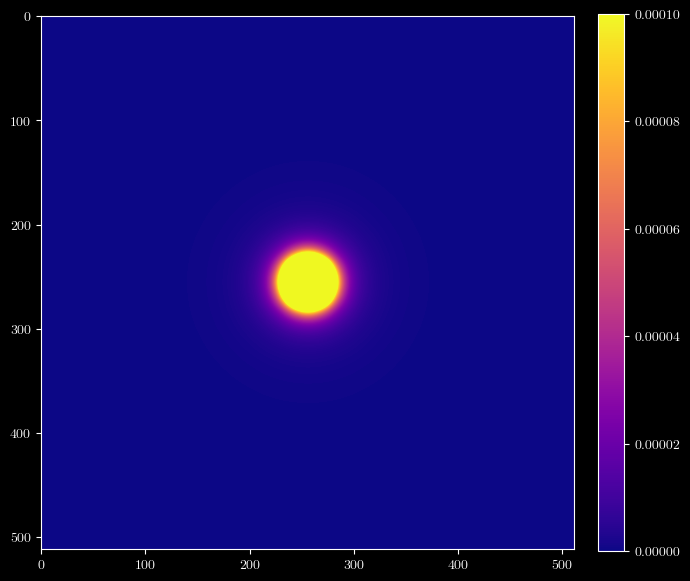

In [147]:
xg = np.linspace(-1, 1, 512)
yg = np.linspace(-1, 1, 512)
X, Y = np.meshgrid(xg, yg, indexing='ij')

Z1 = alpha_31(X, Y)
Z2 = alpha_32(X, Y)
Z = Z1**2 + Z2**2
Z = Z
plt.style.use('dark_background')
fig, ax = plt.subplots(1, 1, figsize=(7,7))
im = ax.imshow(Z, cmap='plasma', vmin=0, vmax=0.0001)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

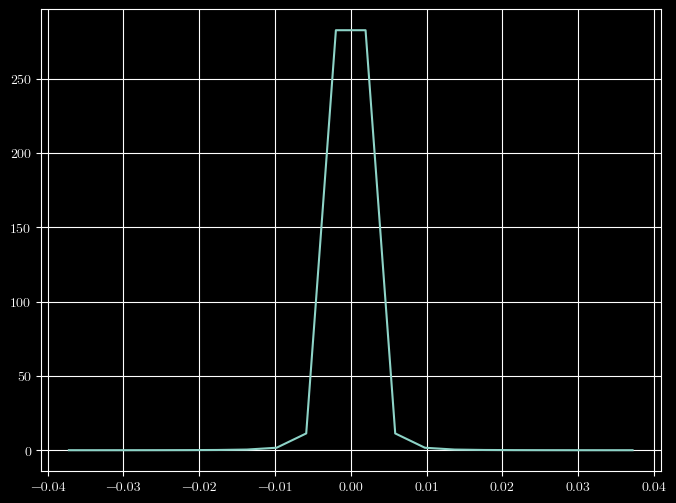

In [148]:
plt.figure(figsize=(8,6))
plt.plot(xg[246:-246], Z[256,246:-246])
plt.grid(True)
plt.show()

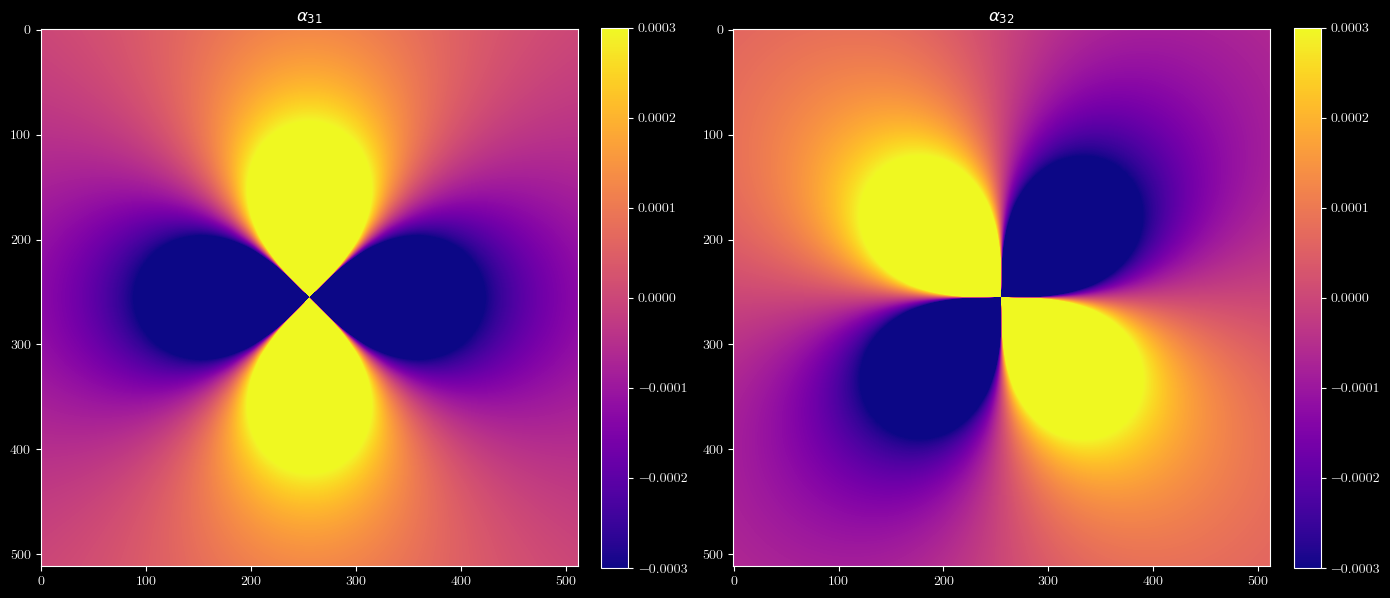

In [157]:
plt.style.use('dark_background')
fig, ax = plt.subplots(1, 2, figsize=(14,7))
im = ax[1].imshow(Z2, vmin=-0.0003, vmax=0.0003, cmap='plasma')
ax[1].set_title(r"$\alpha_{32}$")
fig.colorbar(im, ax=ax[0], fraction=0.046, pad=0.04)
im = ax[0].imshow(Z1, vmin=-0.0003, vmax=0.0003, cmap='plasma')
ax[0].set_title(r"$\alpha_{31}$")
fig.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

In [151]:
# print(pycode(beta_11).replace("x_d", "x").replace("y_d", "y").replace("z_d", "z").replace("math", "np").replace('nu','v').replace('b', 'bmag'))
# print(pycode(beta_12).replace("x_d", "x").replace("y_d", "y").replace("z_d", "z").replace("math", "np").replace('nu','v').replace('b', 'bmag'))
# print(pycode(beta_21).replace("x_d", "x").replace("y_d", "y").replace("z_d", "z").replace("math", "np").replace('nu','v').replace('b', 'bmag'))
# print(pycode(beta_22).replace("x_d", "x").replace("y_d", "y").replace("z_d", "z").replace("math", "np").replace('nu','v').replace('b', 'bmag'))

beta_11 = lambda x,y: (1/4)*bmag*y*(-2*v*x**2 - 2*v*y**2 + 3*x**2 + y**2)/(np.pi*(v*x**4 + 2*v*x**2*y**2 + v*y**4 - x**4 - 2*x**2*y**2 - y**4))
beta_12 = lambda x,y: (1/4)*bmag*x*(2*v*x**2 + 2*v*y**2 - 3*x**2 - y**2)/(np.pi*(v*x**4 + 2*v*x**2*y**2 + v*y**4 - x**4 - 2*x**2*y**2 - y**4))
beta_21 = lambda x,y: (1/4)*bmag*x*(-2*v*x**2 - 2*v*y**2 + x**2 + 3*y**2)/(np.pi*(v*x**4 + 2*v*x**2*y**2 + v*y**4 - x**4 - 2*x**2*y**2 - y**4))
beta_22 = lambda x,y: (1/4)*bmag*y*(-2*v*x**2 - 2*v*y**2 - x**2 + y**2)/(np.pi*(v*x**4 + 2*v*x**2*y**2 + v*y**4 - x**4 - 2*x**2*y**2 - y**4))

In [152]:
b11 = beta_11(X,Y)
b12 = beta_12(X,Y)
b21 = beta_21(X,Y)
b22 = beta_22(X,Y)

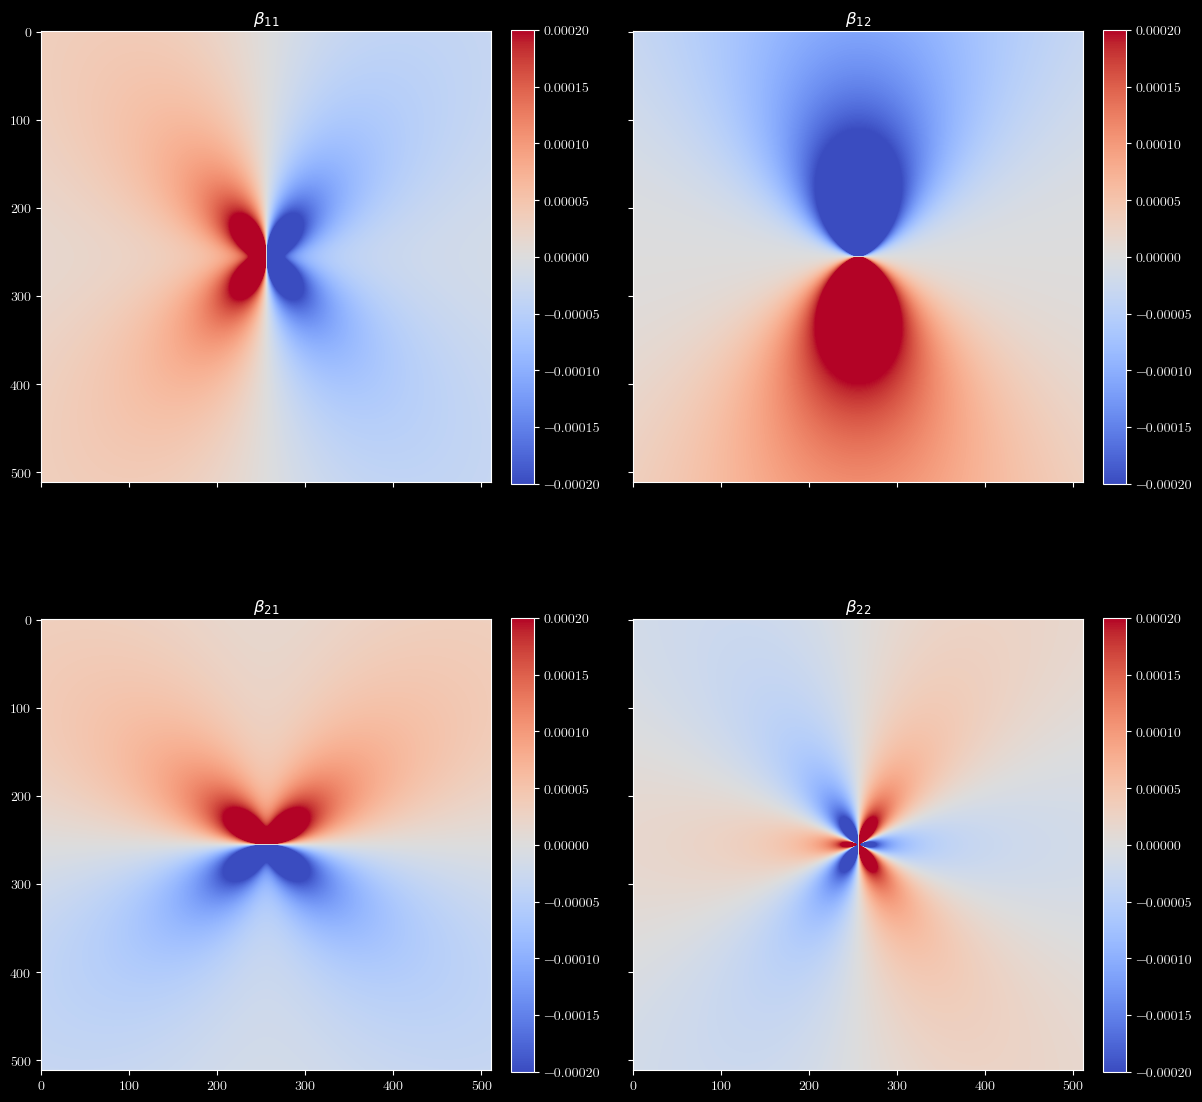

In [153]:
plt.style.use('dark_background')
fig, ax = plt.subplots(2, 2, figsize=(14,14), sharex=True, sharey=True)

im = ax[0,0].imshow(b11, vmin=-0.0002, vmax=0.0002, cmap="coolwarm")
ax[0,0].set_title(r"$\beta_{11}$")
fig.colorbar(im, ax=ax[0,0], fraction=0.046, pad=0.04)

im = ax[0,1].imshow(b12, vmin=-0.0002, vmax=0.0002, cmap="coolwarm")
ax[0,1].set_title(r"$\beta_{12}$")
fig.colorbar(im, ax=ax[0,1], fraction=0.046, pad=0.04)

im = ax[1,0].imshow(b21, vmin=-0.0002, vmax=0.0002, cmap="coolwarm")
ax[1,0].set_title(r"$\beta_{21}$")
fig.colorbar(im, ax=ax[1,0], fraction=0.046, pad=0.04)

im = ax[1,1].imshow(b22, vmin=-0.0002, vmax=0.0002, cmap="coolwarm")
ax[1,1].set_title(r"$\beta_{22}$")
fig.colorbar(im, ax=ax[1,1], fraction=0.046, pad=0.04)

plt.show()